# 9.4. Training Strategies - Hyperparameters


List all the hyperparameters you can tweak in a feed-forward-network: 

https://spiced.space/random-forest-fennel/ds-course/chapters/project_deep_learning/training_strategies/README.html 

What are the hyperparamters of Neural Networks?
- Number of layers
    - The more layers, the more "hidden features" the model learns
    - Too many layers > overfitting.
    - Also, see: ``Vanishing Gradient Problem``
- Loss Functions
    - in general, you choose a loss function based on the type of problem:
        - Regression: **MSE**
        - Binary Classification: **Log Loss / Binary Cross-Entropy**
        - MultiClass Classification: **Cross Entropy**
            - ^this is the one we want for MNIST
- Number of Neurons in each layer
    - More neurons, the more the model can learn / make more complicated decision boundaries
    - Too many can risk overfitting
- Activation Function
    - You have one activation function for a single layer.
    - But you can have different activation functions for different layers.
    - Functions:
        - Step Function
            - Primitive, not used in practice. Good for teaching
        - Sigmoid Function
            - If you have a sigmoid function as your last layer, you always use **log-loss / binary cross entropy** as your loss function.
            - If you use sigmoid function as your last layer, you are implying that the problem is binary classification.
            - Gives us a probability between 0.0 and 1.0
        - SoftMax Function
            - if you have a softmax function as your last layer, you always use **cross-entropy** as your loss function. Use of softmax in final layer implies that the problem is multi-class classification.
            - For MNIST problem, the last layer **MUST** have 10 Neurons, and it **MUST** be a Softmax activation.
        - Linear Function
            - Turn your Neural Network into a Regression Problem.
        - ReLU (Rectified Linear Unit)
            - very popular activation function for hidden layers.
            - trains very fast. Use it for hidden layers.
        - ELU
            - slight twist on ReLU
- Type of Layer
    - Dense / Fully-Connected Layers (i.e. Classic Feed-Forward Networks)
    - **Wednesday**: Convolutional Kernels
        - Image Recognition
    - **Thursday**: Recurrent Neural Networks
        - Time Series Analysis
        - NLP
- Optimizers
    - Use default!
    - Very active area of research is improving the backpropagation algorithm
    - Most popular: ``Adam``
    - See: ``Keras Optimizers``
- Weight Initialization
    - Another big active area of research
    - See: ``He``, ``Xavier``, ``Glorot``
    - Use the default!
- Batches and Epochs
    - Epochs: How many iterations you want your model to train
    - Batch Size: For this week, try batch sizes of ~500-5000
- Regularization: 
    - BatchNormalization()
        - adds two hyperparamters per layer that normalize the inputs to the activation function to a given average and scale.
        - reduces training time
        - improves the accuracy of the outcome
        - predictions take place slightly slower because of the additional operation.
    - Dorpout():
        - random neurons are excluded from the training process. The remaining neurons have to perform regardless. This builds robustness into the network, because it avoids over-specialization of single neurons. When using the trained network for prediction, all neurons participate.
    - Earlystopping():
        - stops the training at the right moment. It monitors the validation loss. When it starts increasing over patience epochs, the training is stopped.

---

## Build a solid MNIST model

- Flatten the X data to be an array of shape (N, 784).
- This means that each incoming data point into the network (i.e. input shape) should be shaped (784, )
- You will also have to one-hot encode the ylabels. You can use keras' to_categorical() function for this.
- This is a multi-class classification problem, so how many neurons should you have in the final layer? And which activation function should it be?
    - 10 neurons and Softmax activation

In [18]:
from tensorflow.keras.datasets import mnist

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

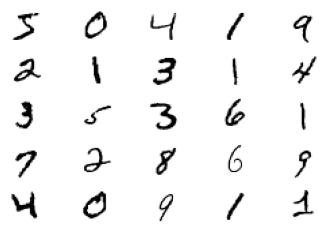

In [19]:
import matplotlib.pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

- Reshape the X data to (N, 784)
    - At least for Feed-Forward-Networks!

In [20]:
xtrain.shape

(60000, 28, 28)

What do the dimensions represent?
- 60,000 images
- each image has 28 rows (height)
- each image has 28 columns (width)

In [21]:
xtrain[0][0][0] #the first pixel of the first row of the first image

0

In [22]:
xtrain[0][18][14]

46

In [23]:
import pandas as pd
#each image has 784 features
#each pixel is an independent feature
pd.DataFrame(xtrain.reshape(60000, 784))

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
xtrain = xtrain.reshape(60000, 784)

In [25]:
xtrain.shape

(60000, 784)

In [26]:
xtrain[0].shape

(784,)

In [27]:
ytrain.shape

(60000,)

In [28]:

from tensorflow.keras.utils import to_categorical

ytrain = to_categorical(ytrain, num_classes=10)


In [29]:
ytrain.shape

(60000, 10)

In [30]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
from tensorflow.keras import Sequential #tf terminology for Feed-Forward Network
from tensorflow.keras.layers import Dense #Fully-connected layers (normal layer of neurons)
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model = Sequential([
    Dense(60, input_shape=(784,)),
    Activation('relu'),
    Dense(20),
    Activation('relu'),
    Dense(10),
    Activation('softmax')  
])

2022-03-06 14:53:41.986980: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-06 14:53:41.987545: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-06 14:53:41.988111: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
activation (Activation)      (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1220      
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 48,530
Trainable params: 48,530
Non-trainable params: 0
____________________________________________________

In [34]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [35]:
callback = EarlyStopping(monitor='val_loss', patience=3)
h = model.fit(xtrain, ytrain, epochs=100, batch_size=500, verbose=1, callbacks=[callback], validation_split=0.2)

2022-03-06 14:54:20.911852: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-06 14:54:20.932959: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2699905000 Hz


Epoch 1/100
96/96 [==============================] - 3s 17ms/step - loss: 19.3236 - accuracy: 0.1150 - val_loss: 2.2994 - val_accuracy: 0.1068
Epoch 2/100
96/96 [==============================] - 2s 17ms/step - loss: 2.2965 - accuracy: 0.1127 - val_loss: 2.2597 - val_accuracy: 0.1133
Epoch 3/100
96/96 [==============================] - 2s 20ms/step - loss: 2.1681 - accuracy: 0.1565 - val_loss: 1.9731 - val_accuracy: 0.2643
Epoch 4/100
96/96 [==============================] - 2s 16ms/step - loss: 1.9162 - accuracy: 0.2774 - val_loss: 1.7675 - val_accuracy: 0.3382
Epoch 5/100
96/96 [==============================] - 2s 17ms/step - loss: 1.6607 - accuracy: 0.3828 - val_loss: 1.3138 - val_accuracy: 0.5715
Epoch 6/100
96/96 [==============================] - 2s 16ms/step - loss: 1.2670 - accuracy: 0.5689 - val_loss: 1.1447 - val_accuracy: 0.6269
Epoch 7/100
96/96 [==============================] - 2s 16ms/step - loss: 1.1095 - accuracy: 0.6249 - val_loss: 1.0626 - val_accuracy: 0.6529
Epoch

In [39]:
# loss and accuracy:
score = model.evaluate(xtrain, ytrain, batch_size=500)
print(score)

120/120 [==============================] - 1s 7ms/step - loss: 0.1725 - accuracy: 0.9562
[0.17247213423252106, 0.9562166929244995]


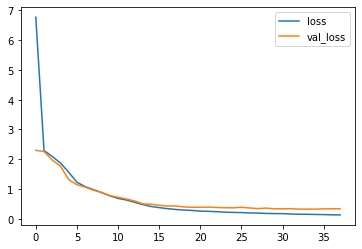

In [54]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])

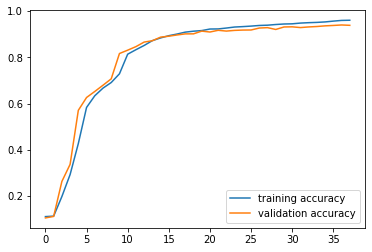

In [41]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])

In [50]:
# prediction on new data points
# print(model.predict(xtest[0]))

- Early Stopping
    - built-in callback function in Keras that will automatically stop training after validation performance starts to stagnate.
    - stop training at an earlier epoch before training and validation losses start to diverge.
- Larger Data Set (greater variety of data)
    - see: ``Keras Data Augmentation`` 
        - creates random rotations, shifts, changes in contrast, brightness
    - efficiently handles memory during training (i.e. only reads in a batch of images at a time in memory)
- Make the model simpler
    - fewer parameters, i.e. fewer neurons/ layers
    - reduce number of epochs
- Regularization
    - artificially inject bias into the model during training 
    - keras.regularizers.l1 (lasso)
    - keras.regularizers.l2 (ridge)
    - these are arguments that you pass in Dense(regularization = keras.regularizers.l2)
    - One of the most popular regularization techniques: **DropOut**
        - In DropOut, random neurons are excluded from the training process. The remaining neurons have to perform regardless. This builds robustness into the network, because it avoids over-specialization of single neurons. When using the trained networks for predictions, all neurons participate.
- Batch Normalization
    - Standard Scaling in between layers of the network
    - Shown to improve performance, also has slight regularization effects

## Writing a trained model to disk


In [ ]:
# pip install h5py

In [51]:
# save model
model.save("mnist_model.h5")
print("Saved model to disk")

Saved model to disk


In [52]:
# load, create and compile model
from tensorflow.keras.models import load_model

network = load_model("mnist_model.h5")
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
activation (Activation)      (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1220      
_________________________________________________________________
activation_1 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 48,530
Trainable params: 48,530
Non-trainable params: 0
____________________________________________________

## Drawing a Keras model

In [53]:
from IPython.display import SVG
from tensorflow.keras.utils import plot_model

plot_model(network,
   to_file='mnist_model.png',
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
